Using TensorFlow Convoluted Neural Network to Identify Defected Parts

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

Define Parameters for Preprocessing

In [2]:
batch_size = 32
img_height = 512
img_width = 512
data_dir = r"C:\Users\Gaurav Gosain\Desktop\Important Docs\JBM Assignment\Clubbed Classified Directory - Copy"

Import Data from Local Computer

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir, labels='inferred', label_mode='int', color_mode='grayscale',image_size=(img_height, img_width),interpolation='bilinear', follow_links=False, 
validation_split=0.35,seed = 123, subset="training",batch_size=batch_size)

Found 385 files belonging to 2 classes.
Using 251 files for training.


Create Validation Data from Local Computer

In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir, labels='inferred', label_mode='int', color_mode='grayscale',image_size=(img_height, img_width),interpolation='bilinear', follow_links=False, 
validation_split=0.35,seed = 123,subset="validation",batch_size=batch_size)

Found 385 files belonging to 2 classes.
Using 134 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Bad', 'Good']


Apply Data Augmentation - Rotation and Flipping

In [6]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.5),
])

Deploy a Convolution Neural Network with 16 Filter Zone and a 4 x 4 Pixel Moving Window

In [7]:
num_classes = 2
CNN_Filters = 8
filter_window = (4,4)
pool_size = (2,2)

from tensorflow.keras import layers
model = tf.keras.Sequential([ 
  layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation, 
  
  # First Convolutional Layer
  layers.Conv2D(CNN_Filters, filter_window, kernel_regularizer=tf.keras.regularizers.L1(0.01),activation='relu'),
  layers.MaxPooling2D(pool_size = pool_size),
  layers.Dropout(0.5),
  
  layers.Flatten(),
  layers.Dense(CNN_Filters, kernel_regularizer=tf.keras.regularizers.L1(0.01), activation='relu'),
  
  # Output Dense Layer
  layers.Dense(num_classes)
])

Compile the CNN Model

In [8]:
from keras.optimizers import SGD
model.compile(
  optimizer='Adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Fit the Model with 5 Epochs

In [9]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 36.4695 - accuracy: 0.7092 - val_loss: 21.0876 - val_accuracy: 0.8433
Epoch 2/10
8/8 [==============================] - 14s 2s/step - loss: 17.3516 - accuracy: 0.7450 - val_loss: 14.2448 - val_accuracy: 0.8433
Epoch 3/10
8/8 [==============================] - 17s 2s/step - loss: 12.0705 - accuracy: 0.7809 - val_loss: 10.6987 - val_accuracy: 0.8433
Epoch 4/10
8/8 [==============================] - 17s 2s/step - loss: 10.5845 - accuracy: 0.7968 - val_loss: 9.2997 - val_accuracy: 0.8433
Epoch 5/10
8/8 [==============================] - 16s 2s/step - loss: 8.7640 - accuracy: 0.8406 - val_loss: 8.2532 - val_accuracy: 0.8433
Epoch 6/10
8/8 [==============================] - 16s 2s/step - loss: 7.6206 - accuracy: 0.8167 - val_loss: 7.1799 - val_accuracy: 0.8433
Epoch 7/10
8/8 [==============================] - 16s 2s/step - loss: 7.1793 - accuracy: 0.8127 - val_loss: 6.9114 - val_accuracy: 0.8433
Epoch 8/10
8/8 [===========

Visualize the Loss Function

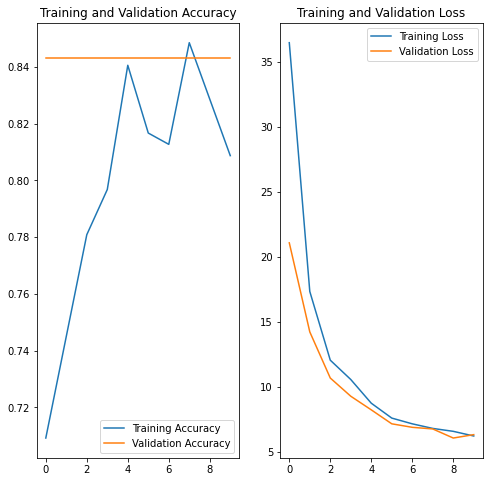

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()